In [11]:
%pip install numpy>2
%pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import scipy as sp

print(np.__version__)
print(sp.__version__)

1.24.3
1.14.1


In [21]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

### Exercício - 001
Utilize a função _pairplot_ da biblioteca `seaborn` para visualizar a separação entre as espécies de iris em duas dimensões. Algum conjunto de 2 características separa completamente as plantas?

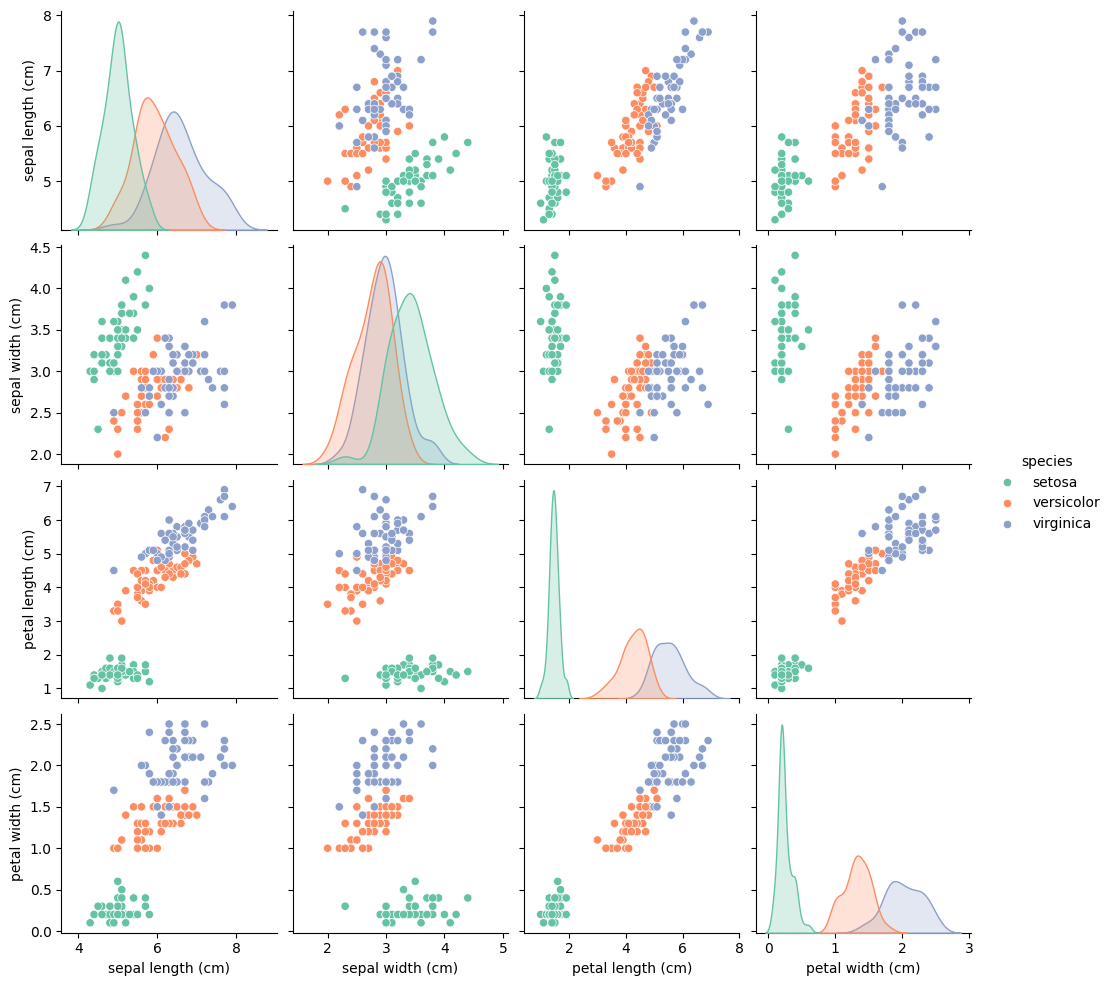

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um DataFrame para facilitar a visualização
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['species'] = y 

# Mapear os números das espécies para nomes
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Criar o pairplot
sns.pairplot(iris_df, hue='species', palette='Set2')
plt.show()

Nenhum conjunto de 2 características permitiu a separação completa das espécies. Todavia, uma separação considerável pode ser observada nos scatter plots correspondendo aos conjuntos: petal length x petal width e sepal width x petal width. 

### Exercício - 002

Utilize o método _PCA_ do módulo `sklearn.decomposition` para executar a análise de componentes principais no conjunto de dados da iris.


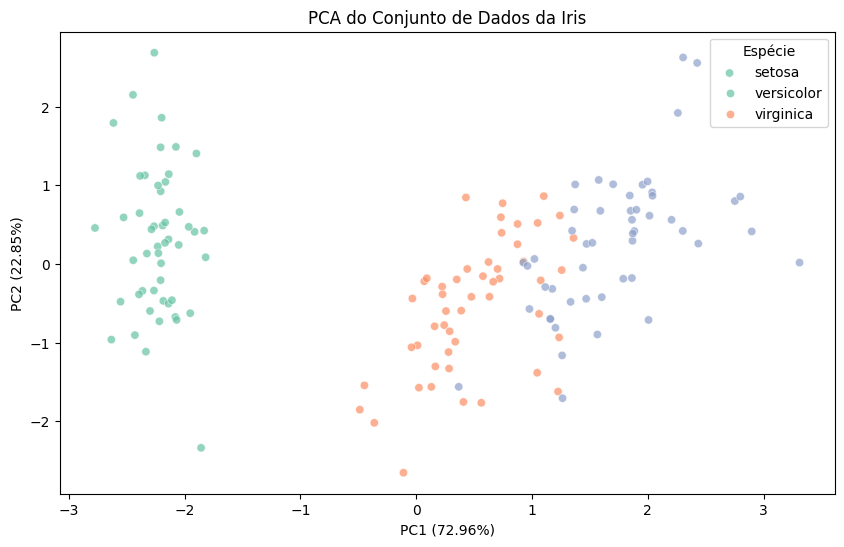

Variância Explicada pelos Componentes Principais: [0.72962445 0.22850762]


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Executar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['species'] = iris_df['species']

# Visualizar os resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='species', palette='Set2', alpha=0.7)
plt.title('PCA do Conjunto de Dados da Iris')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%})')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%})')
plt.legend(title='Espécie', loc='upper right', labels=target_names)
plt.show()

# Variância explicada pelos componentes principais
explained_variance = pca.explained_variance_ratio_
print(f'Variância Explicada pelos Componentes Principais: {explained_variance}')

### Exercício - 003
Faça um diagrama de dispersão das dimensões reduzidas colorindo os pontos pelas classes dos dados.

Respondido no exercício acima. 

### Exercício - 004
Obtenha a variância explicada por cada componente do modelo.

Respondido no exercício acima. 

### Exercício - 005
Execute a centralização dos dados originais da iris (subtrair a média de cada coluna, de cada valor naquela coluna). Multiplique a matriz centralizada pela transposta da matriz `components_` do seu PCA. Compare com a matriz dos seus dados obtida com o método _fit_transform_.

In [19]:
# Centralizar os dados subtraindo a média de cada coluna
X_centered = X - np.mean(X, axis=0)

# Executar a PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Padronizar os dados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Multiplicar a matriz centralizada pela transposta da matriz de componentes
X_reconstructed = X_centered.dot(pca.components_.T)

# Exibir os resultados
print("Matriz original centralizada (primeiras 5 linhas):")
print(X_centered[:5])
print("\nMatriz reconstruída a partir da PCA (primeiras 5 linhas):")
print(X_reconstructed[:5])
print("\nMatriz PCA obtida com fit_transform (primeiras 5 linhas):")
print(X_pca[:5])

Matriz original centralizada (primeiras 5 linhas):
[[-0.74333333  0.44266667 -2.358      -0.99933333]
 [-0.94333333 -0.05733333 -2.358      -0.99933333]
 [-1.14333333  0.14266667 -2.458      -0.99933333]
 [-1.24333333  0.04266667 -2.258      -0.99933333]
 [-0.84333333  0.54266667 -2.358      -0.99933333]]

Matriz reconstruída a partir da PCA (primeiras 5 linhas):
[[-2.43965084  0.00351654]
 [-2.4091903  -0.53361481]
 [-2.62531429 -0.42688836]
 [-2.53440351 -0.55206137]
 [-2.51869218  0.05810435]]

Matriz PCA obtida com fit_transform (primeiras 5 linhas):
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


### Exercício - 006
Utilize o atributo _feature_names_ dos dados da iris para fazer um mapa de calor nomeando os indices da transposta da matriz _components__. Baseado nesse mapa de calor, qual característica da iris contribui mais para separação no primeiro componente principal?

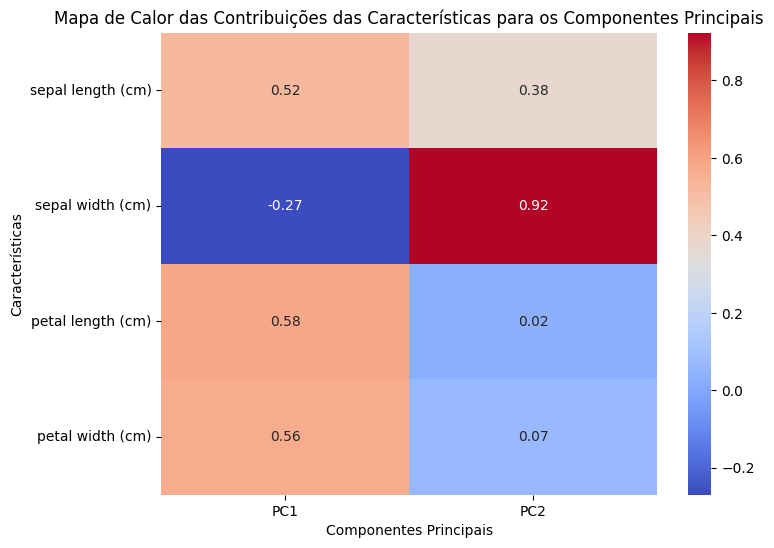

In [22]:
# Criar um DataFrame para os componentes principais e suas contribuições
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2'])

# Criar o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(components_df.T, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Mapa de Calor das Contribuições das Características para os Componentes Principais')
plt.xlabel('Componentes Principais')
plt.ylabel('Características')
plt.show()

In [23]:
# Identificar a característica que mais contribui para o primeiro componente principal
max_contrib = components_df.iloc[0].idxmax()
max_value = components_df.iloc[0].max()

print(f'A característica que mais contribui para o primeiro componente principal (PC1) é: {max_contrib} com um valor de {max_value:.2f}.')

A característica que mais contribui para o primeiro componente principal (PC1) é: petal length (cm) com um valor de 0.58.


### Exercício - 007
Utilize o método _KMeans_ do módulo `sklearn.cluster` para encontrar 3 grupos nos dados da iris.

In [30]:
from sklearn.cluster import KMeans

# Executar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Criar um DataFrame para os dados com os rótulos dos clusters
kmeans_df = pd.DataFrame(data=X_scaled, columns=feature_names)
kmeans_df['Cluster'] = labels
print(kmeans_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.143017         -0.131979          -1.340227         -1.315444   
2            -1.385353          0.328414          -1.397064         -1.315444   
3            -1.506521          0.098217          -1.283389         -1.315444   
4            -1.021849          1.249201          -1.340227         -1.315444   
..                 ...               ...                ...               ...   
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671   

     Cluster  
0          1

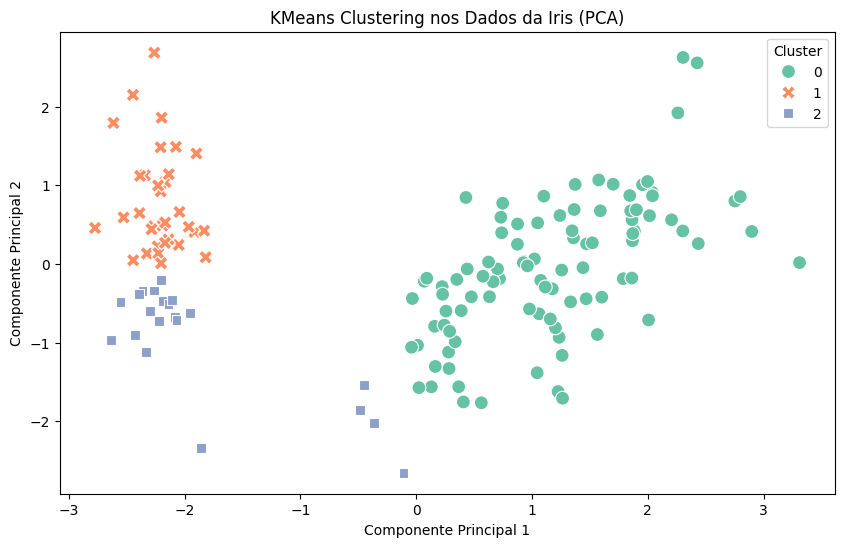

In [28]:
# Executar PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Criar o gráfico de dispersão dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', style='Cluster', s=100)
plt.title('KMeans Clustering nos Dados da Iris (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [29]:
# Comparar os clusters com as classes originais
iris_df = pd.DataFrame(data=X, columns=feature_names)
iris_df['species'] = iris.target
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Adicionar as classes reais ao DataFrame KMeans
kmeans_df['species'] = iris_df['species']

# Mostrar a comparação
print(kmeans_df[['Cluster', 'species']].groupby(['Cluster', 'species']).size().unstack(fill_value=0))

species  setosa  versicolor  virginica
Cluster                               
0             0          46         50
1            33           0          0
2            17           4          0


### Exercício - 008
Faça um diagrama de disperção de duas características da iris destacando os centros dos grupos encontrados, armazenados no atributo _cluster_centers_.

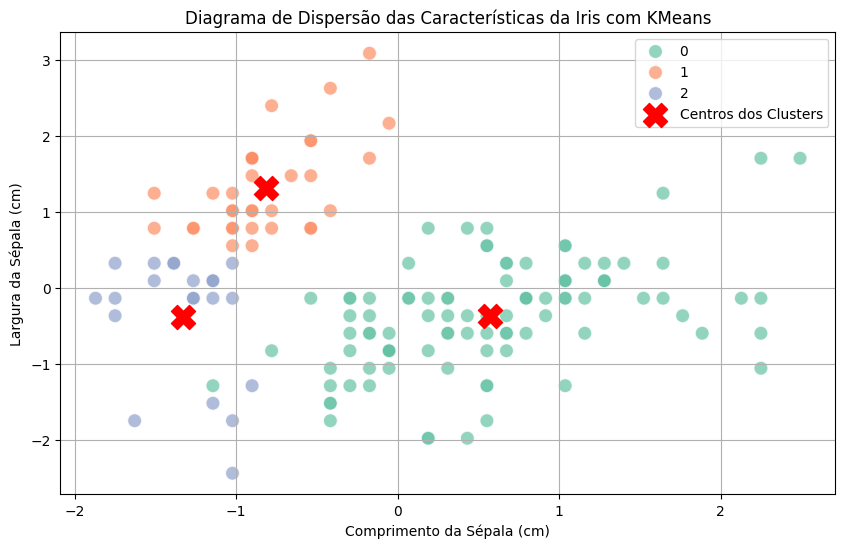

In [31]:
# Criar o diagrama de dispersão com as características selecionadas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kmeans_df, x='sepal length (cm)', y='sepal width (cm)', hue='Cluster', palette='Set2', s=100, alpha=0.7)

# Destacar os centros dos grupos
centers_df = pd.DataFrame(data=centers, columns=feature_names)
centers_df['Cluster'] = range(len(centers))

# Adicionar os centros ao gráfico
plt.scatter(centers_df['sepal length (cm)'], centers_df['sepal width (cm)'], s=300, c='red', marker='X', label='Centros dos Clusters')
plt.title('Diagrama de Dispersão das Características da Iris com KMeans')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.legend()
plt.grid()
plt.show()